In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

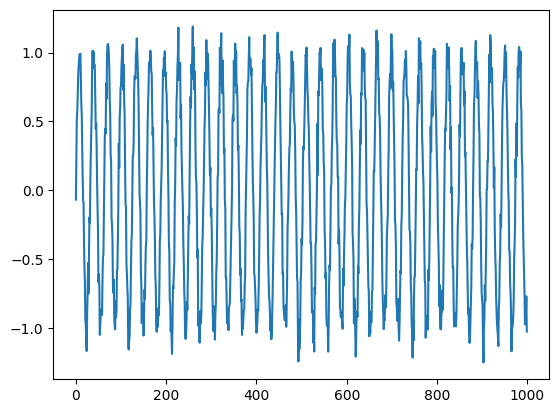

In [2]:
# make original data
N = 1000
series = np.sin(0.2 * np.arange(N)) + np.random.randn(N) * 0.1

plt.plot(series)
plt.show()

In [3]:
### build the dataset
T = 10 # past values to predict the next value
X = []
Y = []
for t in range(len(series) - T):
  x = series[t: t + T]
  X.append(x)
  y = series[t + T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y).reshape(-1, 1)
N = len(X)
print(X.shape, Y.shape)

(990, 10) (990, 1)


In [4]:
### autoregressive linear model
model = nn.Linear(T, 1)

# loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.1)

In [5]:
# make inputs and targets
X_train = torch.from_numpy(X[:-N//2].astype(np.float32))
Y_train = torch.from_numpy(Y[:-N//2].astype(np.float32))
X_test = torch.from_numpy(X[-N//2:].astype(np.float32))
Y_test = torch.from_numpy(Y[-N//2:].astype(np.float32))

In [8]:
def full_gd(model, criterion, optimizer, X_train, y_train, X_test, y_test, epochs=200):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)
  for it in range(epochs):
    optimizer.zero_grad()

    # forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # backward pass
    loss.backward()
    optimizer.step()

    train_losses[it] = loss.item()

    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    test_losses[it] = test_loss.item()

    if(it + 1) % 5 == 0:
      print(f'Epoch: {it + 1}, Train Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

  return train_losses, test_losses

In [9]:
train_losses, test_losses = full_gd(model, criterion, optimizer, X_train, Y_train, X_test, Y_test)

Epoch: 5, Train Loss: 0.0593, Test Loss: 0.1099
Epoch: 10, Train Loss: 0.0216, Test Loss: 0.0275
Epoch: 15, Train Loss: 0.0416, Test Loss: 0.0413
Epoch: 20, Train Loss: 0.0189, Test Loss: 0.0188
Epoch: 25, Train Loss: 0.0274, Test Loss: 0.0222
Epoch: 30, Train Loss: 0.0190, Test Loss: 0.0192
Epoch: 35, Train Loss: 0.0183, Test Loss: 0.0164
Epoch: 40, Train Loss: 0.0175, Test Loss: 0.0175
Epoch: 45, Train Loss: 0.0150, Test Loss: 0.0155
Epoch: 50, Train Loss: 0.0152, Test Loss: 0.0155
Epoch: 55, Train Loss: 0.0146, Test Loss: 0.0155
Epoch: 60, Train Loss: 0.0141, Test Loss: 0.0150
Epoch: 65, Train Loss: 0.0141, Test Loss: 0.0149
Epoch: 70, Train Loss: 0.0140, Test Loss: 0.0148
Epoch: 75, Train Loss: 0.0138, Test Loss: 0.0146
Epoch: 80, Train Loss: 0.0136, Test Loss: 0.0145
Epoch: 85, Train Loss: 0.0135, Test Loss: 0.0144
Epoch: 90, Train Loss: 0.0135, Test Loss: 0.0143
Epoch: 95, Train Loss: 0.0134, Test Loss: 0.0143
Epoch: 100, Train Loss: 0.0133, Test Loss: 0.0142
Epoch: 105, Train Lo

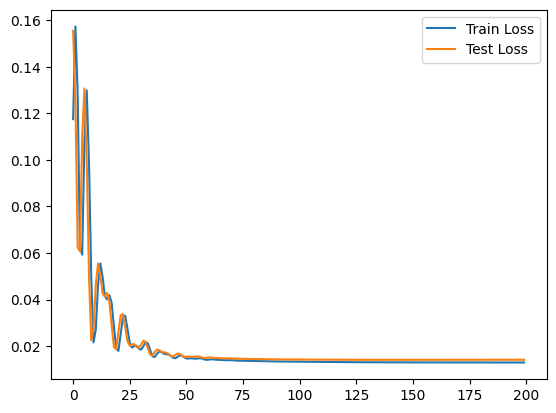

In [10]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

In [11]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = torch.from_numpy(X[-N//2].astype(np.float32))

while len(validation_predictions) < len(validation_target):
  input_ = last_x.view(1, -1)
  p = model(input_)

  validation_predictions.append(p[0][0].item())

  last_x = torch.cat((last_x[1:], p[0]))

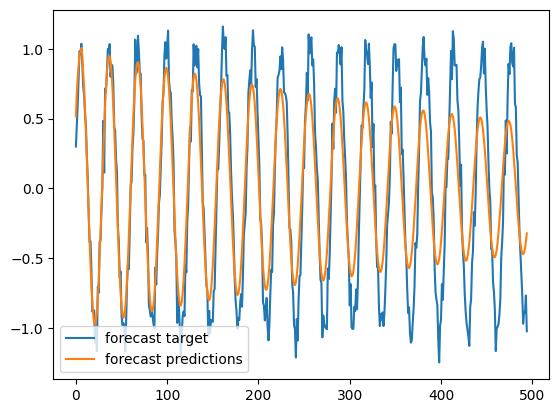

In [12]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast predictions')
plt.legend()
plt.show()